<a href="https://colab.research.google.com/github/Majelyn/AIDA-ML/blob/main/Correlation_Enerio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Majelyn Mhae R. Enerio - Correlation

 Questions

1.Is the no. of facebook likes in Director's Facebook page matters to the gross sales of the movie?

2.What is the correlation , is it negative or positive correlation? Show your graph?

3.Does the plot of the movie dependent to budget? Show the positive and negative correlation if there is?

Share your notebook at cherry.casuat@adamson.edu.ph

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
movies = 'https://raw.githubusercontent.com/Majelyn/AIDA-ML/main/movie_metadata_cleaned.csv'

In [9]:
movie_list = pd.read_csv(movies)

In [10]:
movie_list

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,The Following,Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,359.0,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0
5040,5040,A Plague So Pleasant,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,3.0,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0
5041,5041,Shanghai Calling,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,9.0,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0
5042,5042,My Date with Drew,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0


In [31]:
movie_list.shape

(5044, 29)

In [27]:
movie_list.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0                   2.521500e+03
num_critic_for_reviews       1.387768e+02
duration                     1.064120e+02
director_facebook_likes      6.722183e+02
actor_3_facebook_likes       6.419407e+02
actor_1_facebook_likes       6.549643e+03
gross                        3.996434e+07
num_voted_users              8.365157e+04
cast_total_facebook_likes    9.697141e+03
facenumber_in_poster         1.367367e+00
num_user_for_reviews         2.715811e+02
budget                       3.586720e+07
title_year                   1.959597e+03
actor_2_facebook_likes       1.647170e+03
imdb_score                   6.440860e+00
aspect_ratio                 2.075135e+00
movie_facebook_likes         7.524472e+03
dtype: float64

####1.Is the no. of facebook likes in Director's Facebook page matters to the gross sales of the movie?

In [35]:
movie_list.loc[:,["director_facebook_likes","gross"]]

,director_facebook_likes,gross
0,0.0,760505847.0
1,563.0,309404152.0
2,0.0,200074175.0
3,22000.0,448130642.0
4,131.0,0.0
...,...,...
5039,0.0,0.0
5040,0.0,0.0
5041,0.0,10443.0
5042,16.0,85222.0


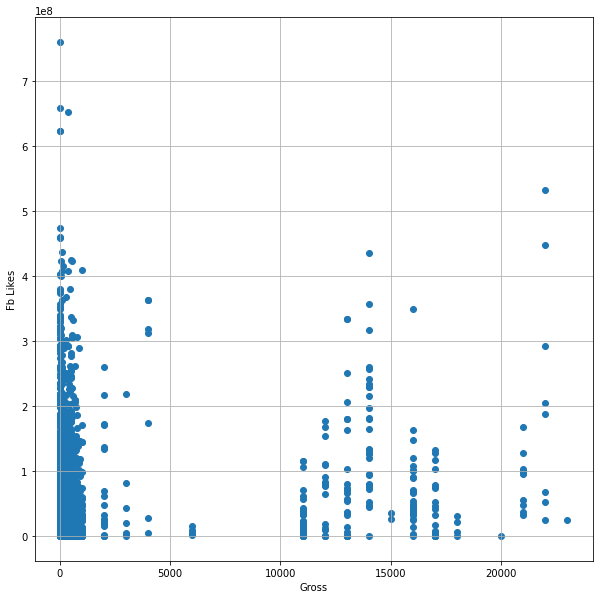

0.14997459675927682

In [91]:
X = movie_list.director_facebook_likes.values
y = movie_list.gross.values

def find_cor(X,y):
    ## Finding the mean of X and y
    x_bar = X.mean()
    y_bar = y.mean()

    ## get the difference for each data point from their means
    sst_x = X-x_bar
    sst_y = y-y_bar

    ## Finding the covariance of X and y
    cov_xy = np.cov(X,y, bias=True)[0,1]

    ## Finding the standard deviation of X and y
    std_X = np.std(X)
    std_y = np.std(y)

    ## Finding the correlation
    R = cov_xy /(std_X*std_y)
    return R

## Plotting the figure
plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(X,y)
plt.xlabel('Gross') 
plt.ylabel('Fb Likes') 
plt.show()


find_cor(X,y)

In [44]:
X = movie_list["director_facebook_likes"]
Y = movie_list["gross"]
corr = X.corr(Y)
corr

0.14997459675927685

In [45]:
movie_list.loc[:,["plot_keywords","budget"]]

,plot_keywords,budget
0,avatar|future|marine|native|paraplegic,237000000.0
1,goddess|marriage ceremony|marriage proposal|pi...,300000000.0
2,bomb|espionage|sequel|spy|terrorist,245000000.0
3,deception|imprisonment|lawlessness|police offi...,250000000.0
4,0,0.0
...,...,...
5039,cult|fbi|hideout|prison escape|serial killer,0.0
5040,0,1400.0
5041,0,0.0
5042,actress name in title|crush|date|four word tit...,1100.0


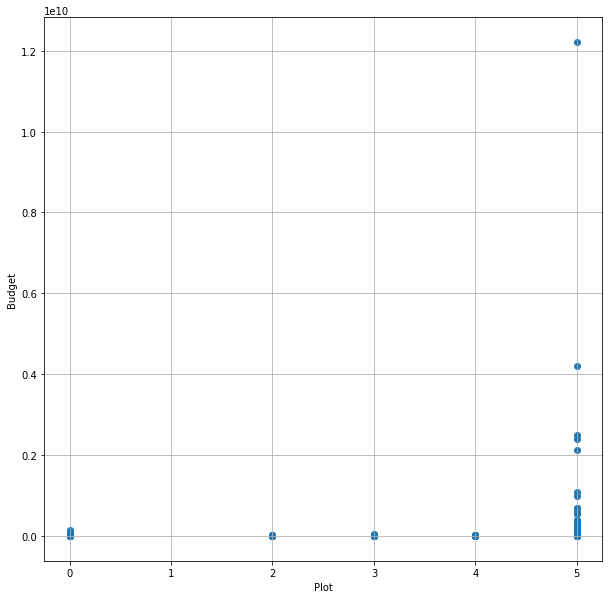

0.03664923641185394

In [92]:
i = movie_list.plot_keywords.str.count('\|') +1 
i = i.replace(1,0).values
j = movie_list.budget

plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(i,j)
plt.ylabel('Budget') 
plt.xlabel('Plot') 
plt.show()

find_cor(i,j)